In [12]:
%matplotlib inline
# interpreter directive - used in jupyter notebook for embedding matplotlib graphs.


# Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.




Estimated number of clusters: 4
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.911


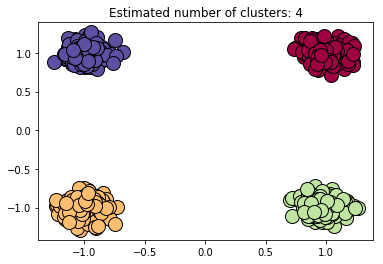

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data you can toy around with parameters.
centers = [[1, 1], [-1, -1],[-1, 1], [1, -1]] # cluster centers,you can change coordinates

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.1,
                            random_state=0) #Generate isotropic Gaussian blobs for clustering.
#change the parameters for different distributions. Read: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

X = StandardScaler().fit_transform(X) #feature wise scaling

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # run DBSCAN
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

#Return an array of zeros with the same shape and type as a given array.
core_samples_mask[db.core_sample_indices_] = True
#core_sample_indices_ : array, shape = [n_core_samples] Indices of core samples.

#assign lables 
labels = db.labels_

#labels_ : array, shape = [n_samples]
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #counting num of clusters

print('Estimated number of clusters: %d' % n_clusters_)

#measures of clustering performance
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result (optional not a part of course)
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()